In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk("C:\\Users\\asus\\Downloads\\archive (4)"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\asus\Downloads\archive (4)\dataset\DATASET\TEST\O\O_12568.jpg
C:\Users\asus\Downloads\archive (4)\dataset\DATASET\TEST\O\O_12569.jpg
C:\Users\asus\Downloads\archive (4)\dataset\DATASET\TEST\O\O_12570.jpg
C:\Users\asus\Downloads\archive (4)\dataset\DATASET\TEST\O\O_12571.jpg
C:\Users\asus\Downloads\archive (4)\dataset\DATASET\TEST\O\O_12572.jpg
C:\Users\asus\Downloads\archive (4)\dataset\DATASET\TEST\O\O_12573.jpg
C:\Users\asus\Downloads\archive (4)\dataset\DATASET\TEST\O\O_12574.jpg
C:\Users\asus\Downloads\archive (4)\dataset\DATASET\TEST\O\O_12575.jpg
C:\Users\asus\Downloads\archive (4)\dataset\DATASET\TEST\O\O_12576.jpg
C:\Users\asus\Downloads\archive (4)\dataset\DATASET\TEST\O\O_12577.jpg
C:\Users\asus\Downloads\archive (4)\dataset\DATASET\TEST\O\O_12578.jpg
C:\Users\asus\Downloads\archive (4)\dataset\DATASET\TEST\O\O_12579.jpg
C:\Users\asus\Downloads\archive (4)\dataset\DATASET\TEST\O\O_12580.jpg
C:\Users\asus\Downloads\archive (4)\dataset\DATASET\TEST\O\O_12581.jpg
C:\Use

In [2]:
import matplotlib.pyplot as plt
from tqdm import tqdm
import cv2
from glob import glob
import random

#CNN
from keras.models import Sequential
from keras.layers import Convolution2D, Flatten, Dense, Input, MaxPooling2D, Dropout
#Metrics
from sklearn.metrics import classification_report,confusion_matrix

C:\Users\asus\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
paths=["C:\\Users\\asus\\Downloads\\archive (4)\\dataset\\DATASET\\TRAIN","C:\\Users\\asus\\Downloads\\archive (4)\\dataset\\DATASET\\TEST"]

In [4]:
labels=[]
for folder in os.listdir(paths[0]):
    labels.append(folder)

dicc_labels = {i:label for i, label in enumerate(os.listdir(paths[0]))}
dicc_labels

{0: 'O', 1: 'R'}

In [5]:
n=[]
s=80
_images=[]
_labels=[]
for j in range(0,2):
  for i,folder in enumerate(labels):
      try:
          for image in os.listdir(paths[j] +'/'+folder):
              img = os.path.join(paths[j]+'/'+folder+'/'+image)
              img = cv2.imread(img)
              img = cv2.resize(img,(s,s))
              img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
              #img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  #if you want to use scale gray
              _images.append(img)
              _labels.append(i)
      except:
          print("error")
  n.append(len(_images))
_images = np.asarray(_images)
_labels = np.asarray(_labels).astype('int64')
print("Images-> ",_images.shape)
print("Amount of data per label-> ",np.bincount(_labels))

Images->  (25077, 80, 80, 3)
Amount of data per label->  [13966 11111]


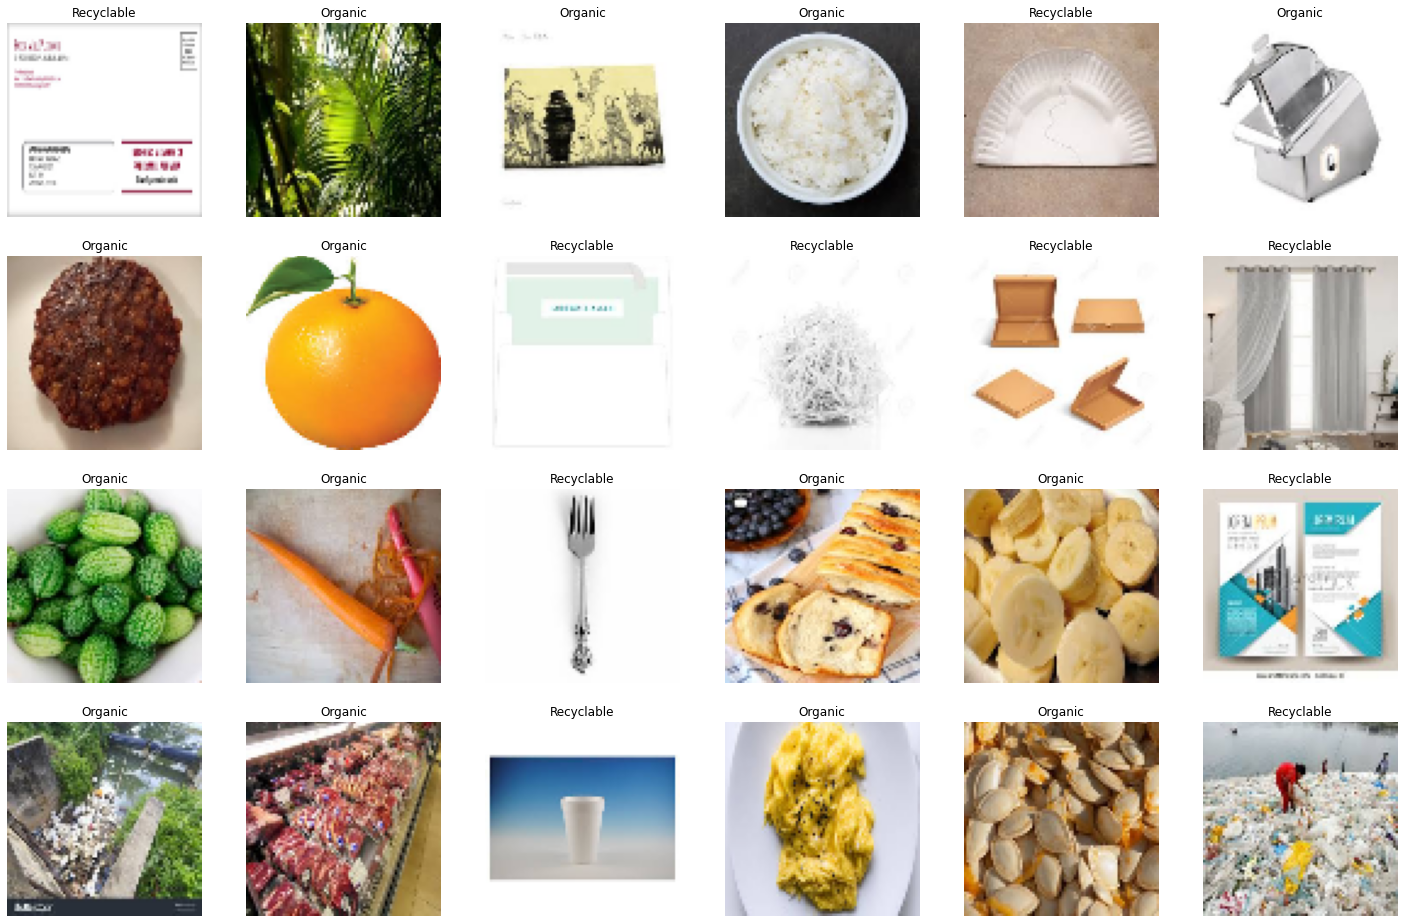

In [6]:
plt.figure(figsize=(25,25))
for i in range(0,24):
    pos= random.randint(0,int(11111+13966))
    plt.subplot(6,6,i+1)
    plt.imshow(_images[pos])    
    plt.axis('off')
    plt.title('Organic' if _labels[pos]==0 else 'Recyclable')

In [7]:
from sklearn.preprocessing import StandardScaler
scal = StandardScaler()
_images =_images.reshape((len(_images),-1))
scal.fit(_images) 
_images_scal = scal.transform(_images)

In [8]:
n

[22564, 25077]

In [9]:
X_train=_images_scal[0:n[0]]  #[0:22564]
y_train=_labels[0:n[0]] #[0:22564]

X_test=_images_scal[n[0]:n[1]] #[22564:25077]
y_test=_labels[n[0]:n[1]]       #[22564:25077]


X_train =X_train.reshape(len(X_train),s,s,3) # s->size. 80
X_test = X_test.reshape(len(X_test),s,s,3)

print("imagenes train-> ",X_train.shape,"labels train-> ",y_train.shape)
print("labels train por categoría-> ",np.bincount(y_train))
print("imagenes test-> ",X_test.shape,"labels train-> ",y_test.shape)
print("label test por categoría-> ",np.bincount(y_test))

imagenes train->  (22564, 80, 80, 3) labels train->  (22564,)
labels train por categoría->  [12565  9999]
imagenes test->  (2513, 80, 80, 3) labels train->  (2513,)
label test por categoría->  [1401 1112]


In [10]:
modelo = Sequential()
modelo.add(Input(shape=(s,s,3)))
modelo.add(Convolution2D(s, kernel_size=3, activation="relu", padding="valid"))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.5))
modelo.add(Convolution2D(s*2, kernel_size=3, activation="relu", padding="valid"))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.5))
modelo.add(Convolution2D(s/2, kernel_size=3, activation="relu", padding="valid"))
modelo.add(MaxPooling2D(pool_size=(2,2)))
modelo.add(Dropout(0.5))
modelo.add(Flatten())
modelo.add(Dense(1, activation="sigmoid"))

modelo.compile(optimizer="adam", loss="binary_crossentropy",
               metrics=["accuracy","Precision"]
)
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 78, 78, 80)        2240      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 39, 39, 80)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 39, 39, 80)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 37, 37, 160)       115360    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 18, 18, 160)      0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 18, 18, 160)       0

Epoch 1/10
706/706 [==============================] - 1085s 2s/step - loss: 0.4497 - accuracy: 0.7996 - precision: 0.7808
Epoch 2/10
706/706 [==============================] - 277s 392ms/step - loss: 0.3751 - accuracy: 0.8428 - precision: 0.8238
Epoch 3/10
706/706 [==============================] - 279s 395ms/step - loss: 0.3465 - accuracy: 0.8576 - precision: 0.8381
Epoch 4/10
706/706 [==============================] - 270s 383ms/step - loss: 0.3309 - accuracy: 0.8671 - precision: 0.8471
Epoch 5/10
706/706 [==============================] - 276s 391ms/step - loss: 0.3201 - accuracy: 0.8700 - precision: 0.8518
Epoch 6/10
706/706 [==============================] - 278s 393ms/step - loss: 0.3171 - accuracy: 0.8719 - precision: 0.8519
Epoch 7/10
706/706 [==============================] - 271s 384ms/step - loss: 0.3069 - accuracy: 0.8775 - precision: 0.8599
Epoch 8/10
706/706 [==============================] - 272s 385ms/step - loss: 0.2998 - accuracy: 0.8795 - precision: 0.8623
Epoch 9/10

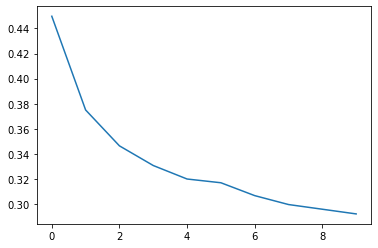

In [11]:
historial=modelo.fit(X_train, y_train, validation_batch_size=(X_test,y_test),epochs=10)
plt.plot(historial.history["loss"])
pred = modelo.predict(X_test)

pred_labels = (pred >= 0.5).astype(int)

In [12]:
pred = modelo.predict(X_test)
pred=np.where(pred >= 0.5, 1, 0)
print(classification_report(
    y_test,
    pred
))

79/79 [==============================] - 6s 73ms/step
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1401
           1       0.94      0.81      0.87      1112

    accuracy                           0.89      2513
   macro avg       0.90      0.89      0.89      2513
weighted avg       0.90      0.89      0.89      2513



In [13]:
cm=confusion_matrix(y_test,pred)
cm

array([[1342,   59],
       [ 208,  904]], dtype=int64)

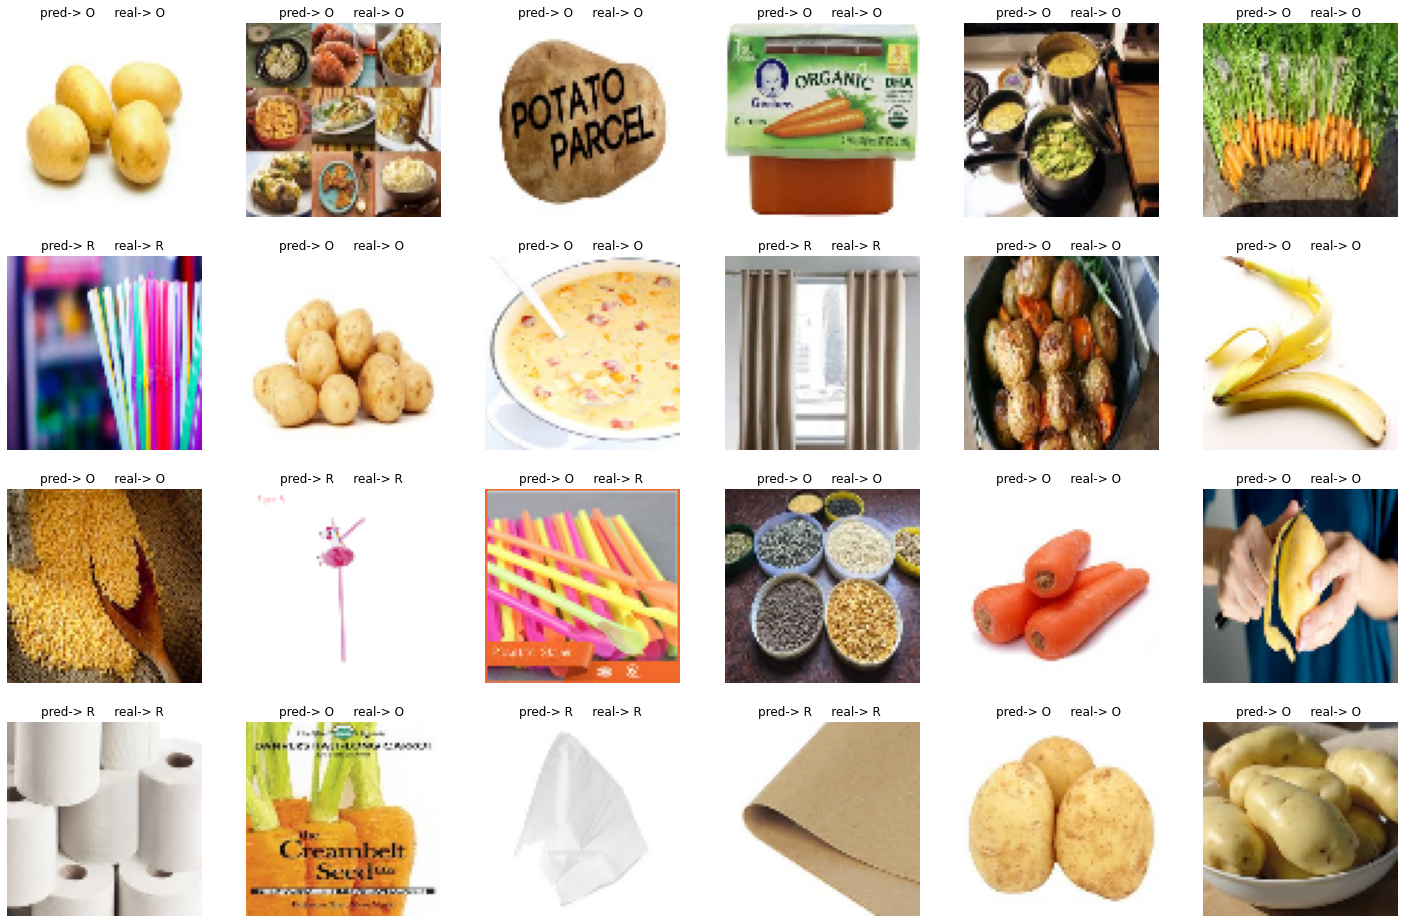

In [14]:
_images =_images.reshape(len(_images),s,s,3)
plt.figure(figsize=(25,25))
for i in range(0,24):
    pos= random.randint(0,int(n[1]-n[0]))
    plt.subplot(6,6,i+1)
    plt.imshow(_images[n[0]+pos])    
    plt.axis('off')
    plt.title("pred-> %s     real-> %s "%(dicc_labels[pred[pos][0]],dicc_labels[y_test[pos]]))

In [15]:
modelo.save('modelo_waste.h5')